In [2]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.sparse import coo_matrix
from sklearn.metrics.pairwise import cosine_similarity

import networkx as nx

path = r'C:\Users\user\Desktop\수업\석사 3차\1. 소셜네트워크분석\3. 과제\Yelp-JSON\Yelp JSON\yelp_dataset'

In [3]:
# Review
# data load
file_name = r'\yelp_academic_dataset_review.json'

data_file = open(path + file_name)

data = []
for line in data_file:
    data.append(json.loads(line))

data_file.close()
df_review = pd.DataFrame(data)

print(df_review.shape)
print(df_review.columns)
df_review.head()

(6990280, 9)
Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [94]:
df_review['business_id'].nunique()

150346

In [4]:
# Social Network
# data load
file_name = r'\yelp_academic_dataset_user.json'

data_file = open(path + file_name)

data = []
for line in data_file:
    data.append(json.loads(line))

data_file.close()
df_friend = pd.DataFrame(data)

print(df_friend.shape)
df_friend.head()

(1987897, 22)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [ ]:
# 리뷰를 n개 이상 남긴 유저만 고려
n = 100
top_k = 5

In [20]:
review_cnt = df_review['user_id'].value_counts(ascending = False)
valid_user = review_cnt.loc[review_cnt >= n].index

In [21]:
df_review_filtered = df_review.loc[df_review['user_id'].isin(valid_user)].reset_index(drop = True)
print(f'리뷰 {n}개 이상 남긴 df:', df_review_filtered.shape)

df_friend_filtered = df_friend.loc[df_friend['user_id'].isin(valid_user)].reset_index(drop = True)
print(f'소셜네트워크에서 리뷰 {n}개 이상 남긴 df:', df_friend_filtered.shape)

리뷰 100개 이상 남긴 df: (840148, 9)
소셜네트워크에서 리뷰 100개 이상 남긴 df: (4365, 22)


Text(0, 0.5, 'Frequency')

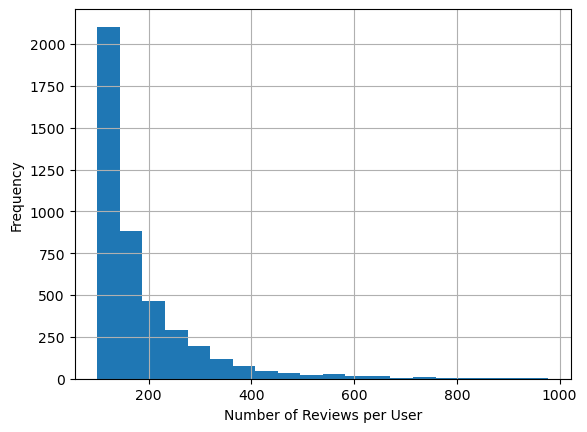

In [ ]:
fil = review_cnt.loc[(review_cnt >= 100) & (review_cnt < 1000)]
fil.hist(bins=20)
plt.xlabel("Number of Reviews per User")
plt.ylabel("Frequency")

In [91]:
# 리뷰를 n개 이상 남긴 유저 비율
def coverage(n):
    return (review_cnt >= n).mean()

for n in [1, 5, 10, 20, 30, 50, 100, 1000]:
    print(n, coverage(n))


1 1.0
5 0.1444297054874696
10 0.05904134403190456
20 0.02259185312956348
30 0.01284754133573181
50 0.006353345617474266
100 0.0021957524639964507
1000 1.056375755874581e-05


In [24]:
# rating matrix 생성
temp = df_review_filtered[['user_id', 'business_id', 'stars']]
temp = temp.copy()

temp['user_cat'] = temp['user_id'].astype('category')
temp['user_idx'] = temp['user_cat'].cat.codes

temp['business_cat'] = temp['business_id'].astype('category')
temp['business_idx'] = temp['business_cat'].cat.codes

rating_mat = coo_matrix((temp['stars'], (temp['user_idx'], temp['business_idx'])))
rating_mat = rating_mat.tocsr()
rating_mat

<4365x107103 sparse matrix of type '<class 'numpy.float64'>'
	with 774889 stored elements in Compressed Sparse Row format>

In [25]:
# 코사인 유사도 top_k명
num_users = rating_mat.shape[0]

rows = []

for i in range(num_users):
    target_user = rating_mat[i]

    sim = cosine_similarity(target_user, rating_mat).flatten()
    sim[i] = -1 # 자기 자신 제거

    top_idx = np.argsort(sim)[-top_k:][::-1]

    for neigh in top_idx:
        rows.append([i, neigh, sim[neigh]])

df_sim = pd.DataFrame(rows, columns = ['user_idx', 'neighbor_idx', 'similarity'])
print(df_sim.info())
df_sim.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21825 entries, 0 to 21824
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_idx      21825 non-null  int64  
 1   neighbor_idx  21825 non-null  int64  
 2   similarity    21825 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 511.7 KB
None


,user_idx,neighbor_idx,similarity
0,0,1873,0.155922
1,0,3676,0.147436
2,0,321,0.137953
3,0,1395,0.137430
4,0,1448,0.134396


In [26]:
# # 저장
# df_sim.to_csv('df_dim.csv', index = False)

# # 다시 불러오기
# df_sim = pd.read_csv('df_sim.csv')

In [27]:
# 테스트
# df_friend_filtered_temp = df_friend_filtered[:1000]
df_friend_filtered_temp = df_friend_filtered
df_friend_filtered_temp

G = nx.Graph()

# 유저 ID 리스트
for idx, row in df_friend_filtered_temp.iterrows():
    user = row['user_id']

    # 친구 목록 (쉼표로 split)
    if pd.notna(row['friends']):
        friends = [f.strip() for f in row['friends'].split(',')]
    else:
        friends = []

    # 그래프에 간선 추가
    for friend in friends:
        G.add_edge(user, friend)

print("그래프 노드 수:", G.number_of_nodes())
print("그래프 엣지 수:", G.number_of_edges())


그래프 노드 수: 570391
그래프 엣지 수: 1146096


In [28]:
# import itertools

# users = df_friend_filtered_temp['user_id'].tolist()
# users

# rows = []

# for u1, u2 in itertools.combinations(users, 2):
#     if u1 in G and u2 in G:
#         try:
#             dist = nx.shortest_path_length(G, u1, u2)
#         except nx.NetworkXNoPath:
#             dist = None
#     else:
#         None
    
#     rows.append([u1, u2, dist])

# df_dist = pd.DataFrame(rows, columns = ['user1', 'user2', 'shortest_path'])
# df_dist


In [29]:
users = df_friend_filtered_temp['user_id'].tolist()
rows = []

for u1 in users:
    lengths = nx.single_source_shortest_path_length(G, u1)

    for u2 in users:
        if u1 == u2: continue

        dist = lengths.get(u2, None)
        rows.append([u1, u2, dist])

df_dist = pd.DataFrame(rows, columns = ["user1", "user2", "shortest_path"])

df_dist_reduced = df_dist[df_dist['user1'] < df_dist['user2']].copy()
df_dist_reduced.reset_index(drop=True, inplace=True)
 
del df_dist
import gc
gc.collect()

print(df_dist_reduced.info())
print(df_dist_reduced.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9524430 entries, 0 to 9524429
Data columns (total 3 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user1          object 
 1   user2          object 
 2   shortest_path  float64
dtypes: float64(1), object(2)
memory usage: 218.0+ MB
None
                    user1                   user2  shortest_path
0  MGPQVLsODMm9ZtYQW-g_OA  rppTTi-kfF8-qyiArNemag            2.0
1  MGPQVLsODMm9ZtYQW-g_OA  RgDVC3ZUBqpEe6Y1kPhIpw            1.0
2  MGPQVLsODMm9ZtYQW-g_OA  OmjMNG77obZOKQ59o-Tx4Q            2.0
3  MGPQVLsODMm9ZtYQW-g_OA  asAdx4Q3cAMykgPgtQt6cg            2.0
4  MGPQVLsODMm9ZtYQW-g_OA  gRL9s6ENxV1qermRYDWjPQ            2.0


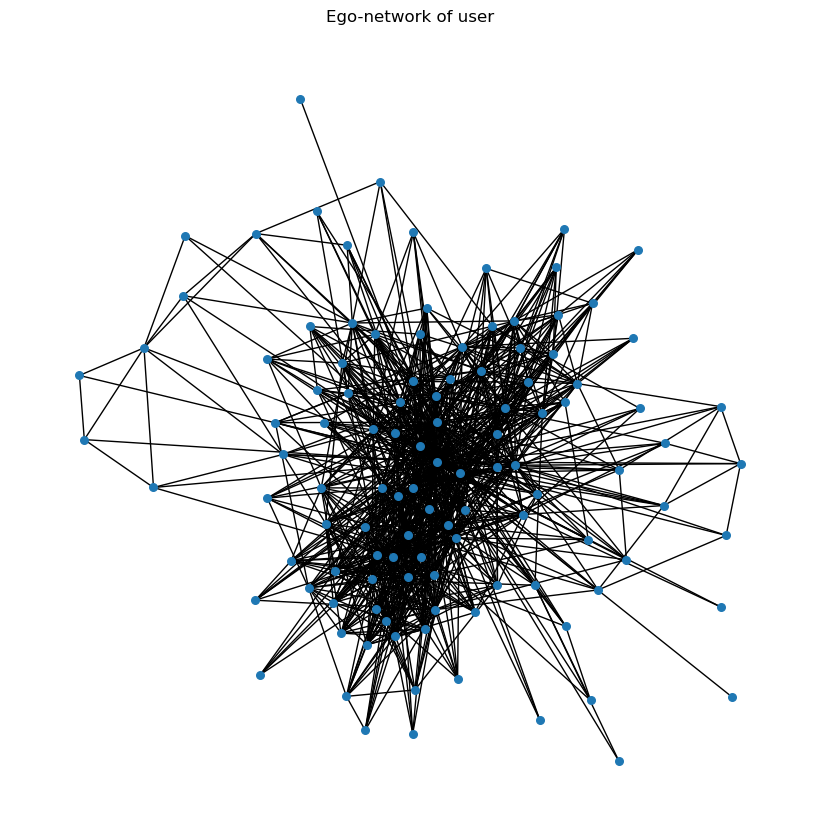

In [48]:
# 시각화
user = "j14WgRoU_-2ZE1aw1dXrJg"

# Ego graph
ego = nx.ego_graph(G, user, radius=1)

plt.figure(figsize=(8, 8))
nx.draw(ego, with_labels=False, node_size=30)
plt.title("Ego-network of user")
plt.show()


In [36]:
# # index to id 매핑
user_idx_to_id = dict(enumerate(temp['user_cat'].cat.categories))
# user_idx_to_id

# id to index 매핑
user_id_to_idx = {v: k for k, v in user_idx_to_id.items()}
user_id_to_idx


{'-2nNiAnDaSbQayynsqgL6Q': 0,
 '-3s52C4zL_DHRK0ULG6qtg': 1,
 '-4vkTh2rImD8c0-30h2uvw': 2,
 '-7XrSrJfHndHc_taEXurTw': 3,
 '-7qUbOVWJp2NT3f_TNuIBA': 4,
 '-8PU0Z4Q2Nc-sY0eBj4DiQ': 5,
 '-B-QEUESGWHPE_889WJaeg': 6,
 '-Bv2DxQtG7xPYdJqlqL9fQ': 7,
 '-CzwjrantVGMmZB8Qj_7-Q': 8,
 '-FxsSuwDbIII7yo5BjHpiA': 9,
 '-G7Zkl1wIWBBmD0KRy_sCw': 10,
 '-GDdBOfhrxn7lAGblLSoqA': 11,
 '-GowNe73gDZs9MfS3ugJDQ': 12,
 '-HYCAMf2ml717YD5Y9PKIg': 13,
 '-Her419l4DCjSFey7UjmtA': 14,
 '-JN2qTghHtB1dW4YDVlBRQ': 15,
 '-KduD3wwydWDq2GrODh2tw': 16,
 '-NipQme-3bdfY3LlfBwzCA': 17,
 '-NycZLw5rPxqwrkKKI-83w': 18,
 '-Oer2os7LrtAagVuWSN1AQ': 19,
 '-Oqfoc4KyhzYY0qvSkxkrg': 20,
 '-PHhewouMe4OcObjdqBWAA': 21,
 '-Pb9gXleMSXS8quej_zL1Q': 22,
 '-QmEKJ_CzZnT9biZHddfZQ': 23,
 '-SigNCNItQDtSq27j0t_tw': 24,
 '-THLGnsYKu3yQAsy_tt1fw': 25,
 '-TLXQfY2lZ6DVWQj4BosxQ': 26,
 '-Tg5YTEMbnYw3fQN99xKCQ': 27,
 '-V7frksbFjKQYVhrPnnlPw': 28,
 '-WKOdr26Clxm5pIZ_HLSSA': 29,
 '-WdMmmWVU5TZ9bfy0Cg3Ng': 30,
 '-ZHlPAvlVdgtiu6DiCq7Yg': 31,
 '-_OH-t_Tnm3-I2Rp

In [37]:
# # 유사도 매트릭스에서의 user_idx, user_id 매핑
# df_sim['user_id'] = df_sim['user_idx'].map(user_idx_to_id)
# df_sim['neighbor_id'] = df_sim['neighbor_idx'].map(user_idx_to_id)
# df_sim

# 거리 매트릭스에서의 user_idx, user_id 매핑
df_dist_reduced['user_idx'] = df_dist_reduced['user1'].map(user_id_to_idx)
df_dist_reduced['neighbor_idx'] = df_dist_reduced['user2'].map(user_id_to_idx)
df_dist_reduced

,user1,user2,shortest_path,user_idx,neighbor_idx
0,MGPQVLsODMm9ZtYQW-g_OA,rppTTi-kfF8-qyiArNemag,2.0,1602,3784
1,MGPQVLsODMm9ZtYQW-g_OA,RgDVC3ZUBqpEe6Y1kPhIpw,1.0,1602,1940
2,MGPQVLsODMm9ZtYQW-g_OA,OmjMNG77obZOKQ59o-Tx4Q,2.0,1602,1767
3,MGPQVLsODMm9ZtYQW-g_OA,asAdx4Q3cAMykgPgtQt6cg,2.0,1602,2623
4,MGPQVLsODMm9ZtYQW-g_OA,gRL9s6ENxV1qermRYDWjPQ,2.0,1602,2993
...,...,...,...,...,...
9524425,mQQOu0qTdA-b6IglEXhCMw,yFNNUbZN8MpWqeRJ4k2_lg,NaN,3408,4251
9524426,mQQOu0qTdA-b6IglEXhCMw,vdioUea83QYfcVpet3PELw,NaN,3408,4071
9524427,mQQOu0qTdA-b6IglEXhCMw,zfZYJRZAIVGEJD93ICRZyg,NaN,3408,4338
9524428,mQQOu0qTdA-b6IglEXhCMw,qHNUaRc4qC3h2xOKBppjWQ,NaN,3408,3680


In [38]:
# merge
df_merged = pd.merge(df_sim, df_dist_reduced,
                     on = ['user_idx', 'neighbor_idx'],
                     how = 'inner')

In [39]:
df_merged.info()
df_merged

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10495 entries, 0 to 10494
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_idx       10495 non-null  int64  
 1   neighbor_idx   10495 non-null  int64  
 2   similarity     10495 non-null  float64
 3   user1          10495 non-null  object 
 4   user2          10495 non-null  object 
 5   shortest_path  10166 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 492.1+ KB


,user_idx,neighbor_idx,similarity,user1,user2,shortest_path
0,0,1873,0.155922,-2nNiAnDaSbQayynsqgL6Q,QaCbRxUMAcTJl5YwA6inDA,2.0
1,0,3676,0.147436,-2nNiAnDaSbQayynsqgL6Q,qA_8SkGk6ub8nTjoY1q6Cw,1.0
2,0,321,0.137953,-2nNiAnDaSbQayynsqgL6Q,3hANLGwpP5tXgHOes2XheA,2.0
3,0,1395,0.137430,-2nNiAnDaSbQayynsqgL6Q,JTbWKeaQLH0w2TWCiRjq4g,2.0
4,0,1448,0.134396,-2nNiAnDaSbQayynsqgL6Q,KDewJBJknfWvQyHHFNbfdg,1.0
...,...,...,...,...,...,...
10490,4245,4354,0.155427,y9Z1goRUMW8H9GqBhXp15Q,ztVQFPr9khc_TjsBny-3rA,3.0
10491,4258,4310,0.134547,yIsQ4qFCyY-clmlRwQlw_w,z9sL9d4kfAiQeGJ1dGmBng,1.0
10492,4272,4355,0.103243,yZwgNBKJb6YFnS7_lo8pGg,zu-e06_BM_TdkAZEKMrIww,2.0
10493,4297,4364,0.131161,yzTk963RIrNXI7S68LKraA,zyvxtbh5eJ86bVgk52Yflg,2.0


In [40]:
df_merged['shortest_path'].unique()

array([ 2.,  1.,  3.,  4.,  5., nan])

In [45]:
import scipy.stats as stats
df_merged_dropna = df_merged.dropna(subset = ['shortest_path'])

user_sim = df_merged_dropna['similarity'].to_list()
st_path = df_merged_dropna['shortest_path'].to_list()

rho, p_val = stats.pearsonr(user_sim, st_path)
print(rho, p_val)

-0.2932988786997921 7.955820681969704e-201
